# Preprocesamiento: Ejemplo

In [1]:
# Importamos las librerías correspondientes:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Cargamos nuestro dataset:
data = pd.read_csv('C:\\Users\\andre\\OneDrive\\Escritorio\\insurance_2.csv', index_col=0)

In [2]:
data.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.90,0,yes,16.884924
1,18,male,33.77,1,no,1.725552
2,28,male,33.00,3,no,4.449462
3,33,male,NaN,0,no,21.984471
4,32,male,28.88,0,no,3.866855


In [3]:
data.shape

(1338, 6)

## Missing Values

Contamos cuantos valores nulos hay:

In [4]:
data.isnull().sum()

age          0
sex          0
bmi         96
children     0
smoker       0
charges      0
dtype: int64

Contamos cuántos faltantes hay según el grupo:

In [5]:
data.isnull().groupby([data['smoker']]).sum()

,age,sex,bmi,children,smoker,charges
smoker,,,,,,
no,0,0,84,0,0,0
yes,0,0,12,0,0,0


### Eliminar valores faltantes

Una alternativa es descartar las filas que tienen algún nulo (siempre que no sean muchas!). Se puede usar [dropna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html) de pandas.

In [6]:
data.dropna()

,age,sex,bmi,children,smoker,charges
0,19,female,27.90,0,yes,16.884924
1,18,male,33.77,1,no,1.725552
2,28,male,33.00,3,no,4.449462
4,32,male,28.88,0,no,3.866855
6,46,female,33.44,1,no,8.240590
...,...,...,...,...,...,...
1332,52,female,44.70,3,no,11.411685
1333,50,male,30.97,3,no,10.600548
1334,18,female,31.92,0,no,2.205981
1335,18,female,36.85,0,no,1.629833


### Rellenar valores faltantes

Para *imputar* valores (rellenar) hay distintas estrategias. Una opción es llenar con un valor constante. Se puede usar [fillna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html) de pandas.

In [7]:
data2 = data.fillna(data.mean())

C:\Users\andre\AppData\Local\Temp\ipykernel_7156\953080936.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data2 = data.fillna(data.mean())


¿Y cómo afecta la imputación a nuestros datos? Hagamos un pairplot de los datos antes y después de la imputación

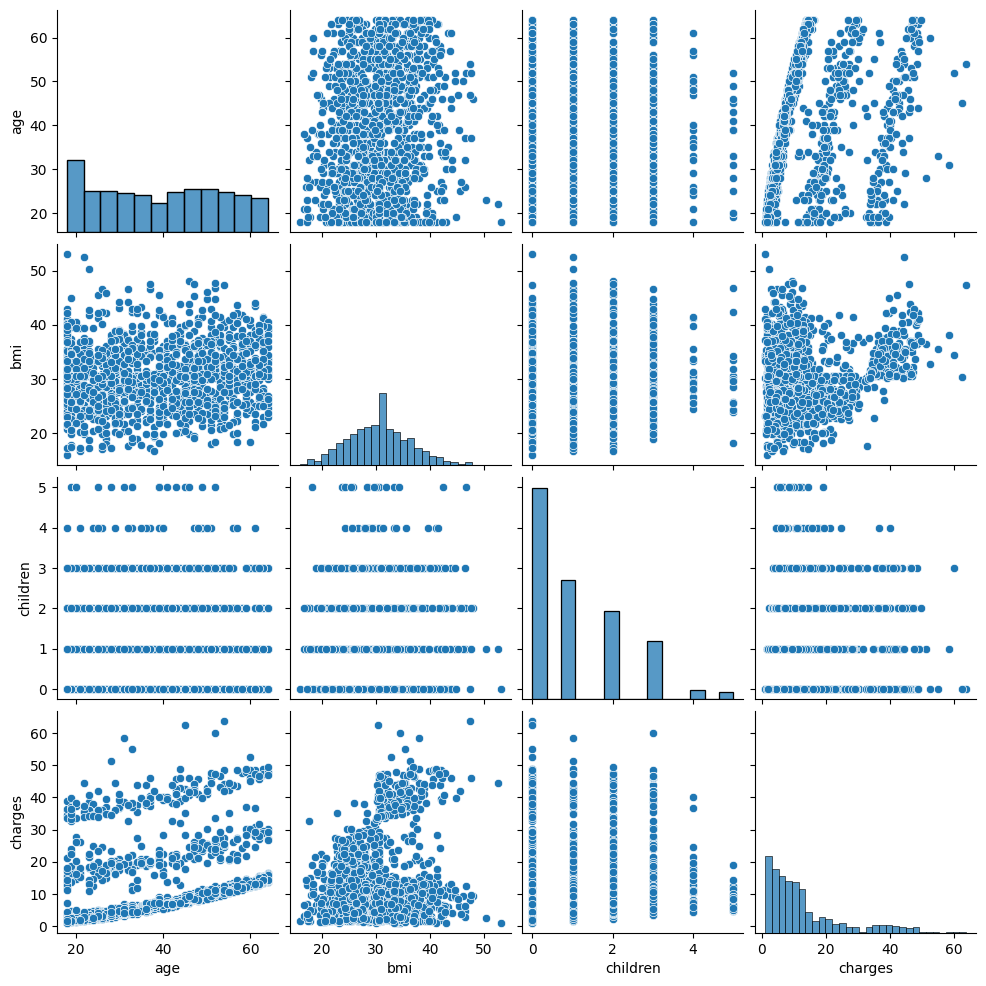

In [9]:
sns.pairplot(data2)